In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import combinations

%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [45]:
data = pd.read_csv('tidy_socialmedia_data.csv', index_col=0) 
data.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,Session.Instance.Response.Lapse,Reminders.Delivered,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,full_count
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,00:00:06,0,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,10
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,00:02:48,0,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,10
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,00:03:02,0,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,10
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,00:34:28,0,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,10
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,00:02:12,0,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,10


In [46]:
# Select ESM questionnaire variables

ESM_quest = data.loc[:,['Fatigue', 'LowMood', 'Loneliness',
                        'Concentrat', 'LossOfInt', 'Inferior',
                        'Hopeless', 'Stress']]

ESM_quest.describe().round()

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress
count,8652.0,8647.0,8646.0,8643.0,8646.0,8646.0,8649.0,8648.0
mean,37.0,13.0,12.0,26.0,26.0,11.0,12.0,21.0
std,30.0,18.0,17.0,26.0,26.0,15.0,17.0,23.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,10.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
50%,30.0,6.0,5.0,19.0,18.0,3.0,5.0,14.0
75%,64.0,20.0,18.0,45.0,40.0,17.0,19.0,30.0
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


# Clustering Analysis

In [47]:
from sklearn.cluster import KMeans

In [48]:
ESM_quest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8687 entries, 1 to 12245
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fatigue     8652 non-null   float64
 1   LowMood     8647 non-null   float64
 2   Loneliness  8646 non-null   float64
 3   Concentrat  8643 non-null   float64
 4   LossOfInt   8646 non-null   float64
 5   Inferior    8646 non-null   float64
 6   Hopeless    8649 non-null   float64
 7   Stress      8648 non-null   float64
dtypes: float64(8)
memory usage: 610.8 KB


In [49]:
data_clustering = pd.concat([data[['Participant']], ESM_quest], axis=1, sort=False)

In [50]:
data_clustering.head()

,Participant,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress
1,115091,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0
2,115091,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0
3,115091,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0
4,115091,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0
6,115091,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0


In [51]:
data_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8687 entries, 1 to 12245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Participant  8687 non-null   int64  
 1   Fatigue      8652 non-null   float64
 2   LowMood      8647 non-null   float64
 3   Loneliness   8646 non-null   float64
 4   Concentrat   8643 non-null   float64
 5   LossOfInt    8646 non-null   float64
 6   Inferior     8646 non-null   float64
 7   Hopeless     8649 non-null   float64
 8   Stress       8648 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 678.7 KB


In [52]:
# Cambiamos el tipo de dato de Participant
data_clustering['Participant']= data_clustering['Participant'].astype(object)

In [53]:
data_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8687 entries, 1 to 12245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Participant  8687 non-null   object 
 1   Fatigue      8652 non-null   float64
 2   LowMood      8647 non-null   float64
 3   Loneliness   8646 non-null   float64
 4   Concentrat   8643 non-null   float64
 5   LossOfInt    8646 non-null   float64
 6   Inferior     8646 non-null   float64
 7   Hopeless     8649 non-null   float64
 8   Stress       8648 non-null   float64
dtypes: float64(8), object(1)
memory usage: 678.7+ KB


In [54]:
#Calculamos las medias por participante
data_clustering_mean=data_clustering.groupby('Participant').mean()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data_clustering_mean)

               Fatigue    LowMood  Loneliness  Concentrat  LossOfInt  \
Participant                                                            
115091       45.155844  20.454545   23.285714   37.272727  47.675325   
131183       36.288136   3.474576    0.389831   19.508475  14.508475   
438907       51.040816  26.285714   21.833333   35.729167  50.979592   
515070       34.865385  12.692308   14.076923   32.903846  16.038462   
572172       18.272727  10.738636    9.375000   14.352273  25.761364   
680605       60.894737  14.915789    3.663158   46.852632  37.473684   
696084       46.555556  12.083333   13.263889   35.333333  34.083333   
697356        3.870370   1.259259    0.240741    1.814815   0.833333   
857523       31.365591  21.419355   20.645161   24.677419  23.741935   
883656       32.325843  17.696629   18.887640   21.370787  24.820225   
1102830      28.957447   3.382979    1.702128   22.702128  21.106383   
1156365      15.303371  11.460674   11.213483   12.741573  12.28

In [55]:
# Comprobamos que no existan datos nulos para continuar con el análisis
data_clustering_mean[data_clustering_mean.isnull().any(axis=1)].count()

Fatigue       0
LowMood       0
Loneliness    0
Concentrat    0
LossOfInt     0
Inferior      0
Hopeless      0
Stress        0
dtype: int64

Identificación del número óptimo de clúster en el conjunto de **Síntomas de depresión** utilizando el método de la distorsión o método del codo:

In [56]:
# Función que generar la gráfica del método Elbow que recibe un conjunto de datos y un título del gráfico:
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plot(range(1, max_k), inertia, 'bx-')
    xlabel('k')
    ylabel(u'Dispersión')
    title(figure_name)

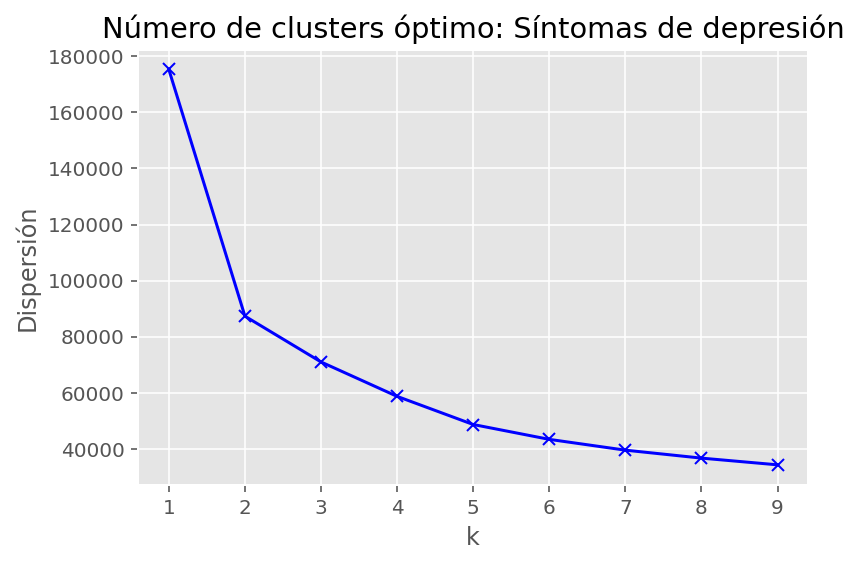

In [57]:
plot_dispersion(data_clustering_mean, 'Número de clusters óptimo: Síntomas de depresión')

Observamos que a partir de 5 k el valor promedio de la dispersión se empieza a reducir más lentamente. Sin embargo, para asegurarnos vamos a utilizar otro metodo para definir el número de cluster llamado Silhouette.

In [58]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)

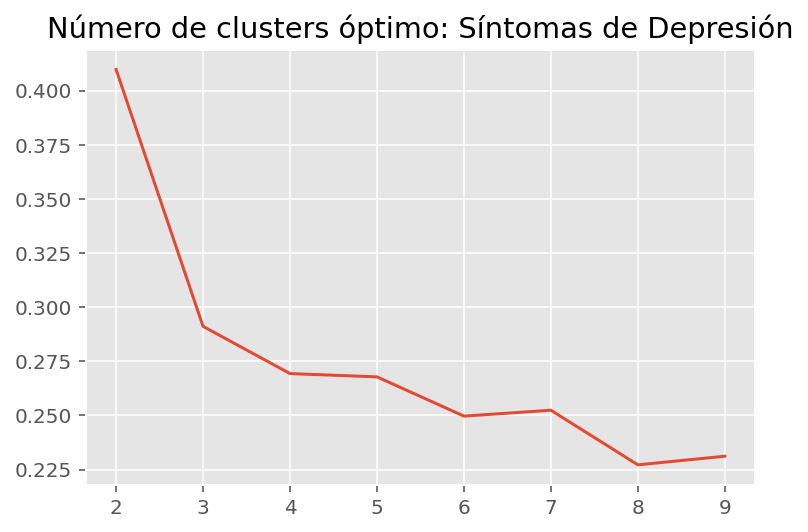

In [59]:
plot_sillhouette(data_clustering_mean, 'Número de clusters óptimo: Síntomas de Depresión')

Con este método obtenemos que el número optimo es 5 k

Text(0.5, 0.92, 'Clustering K-means')

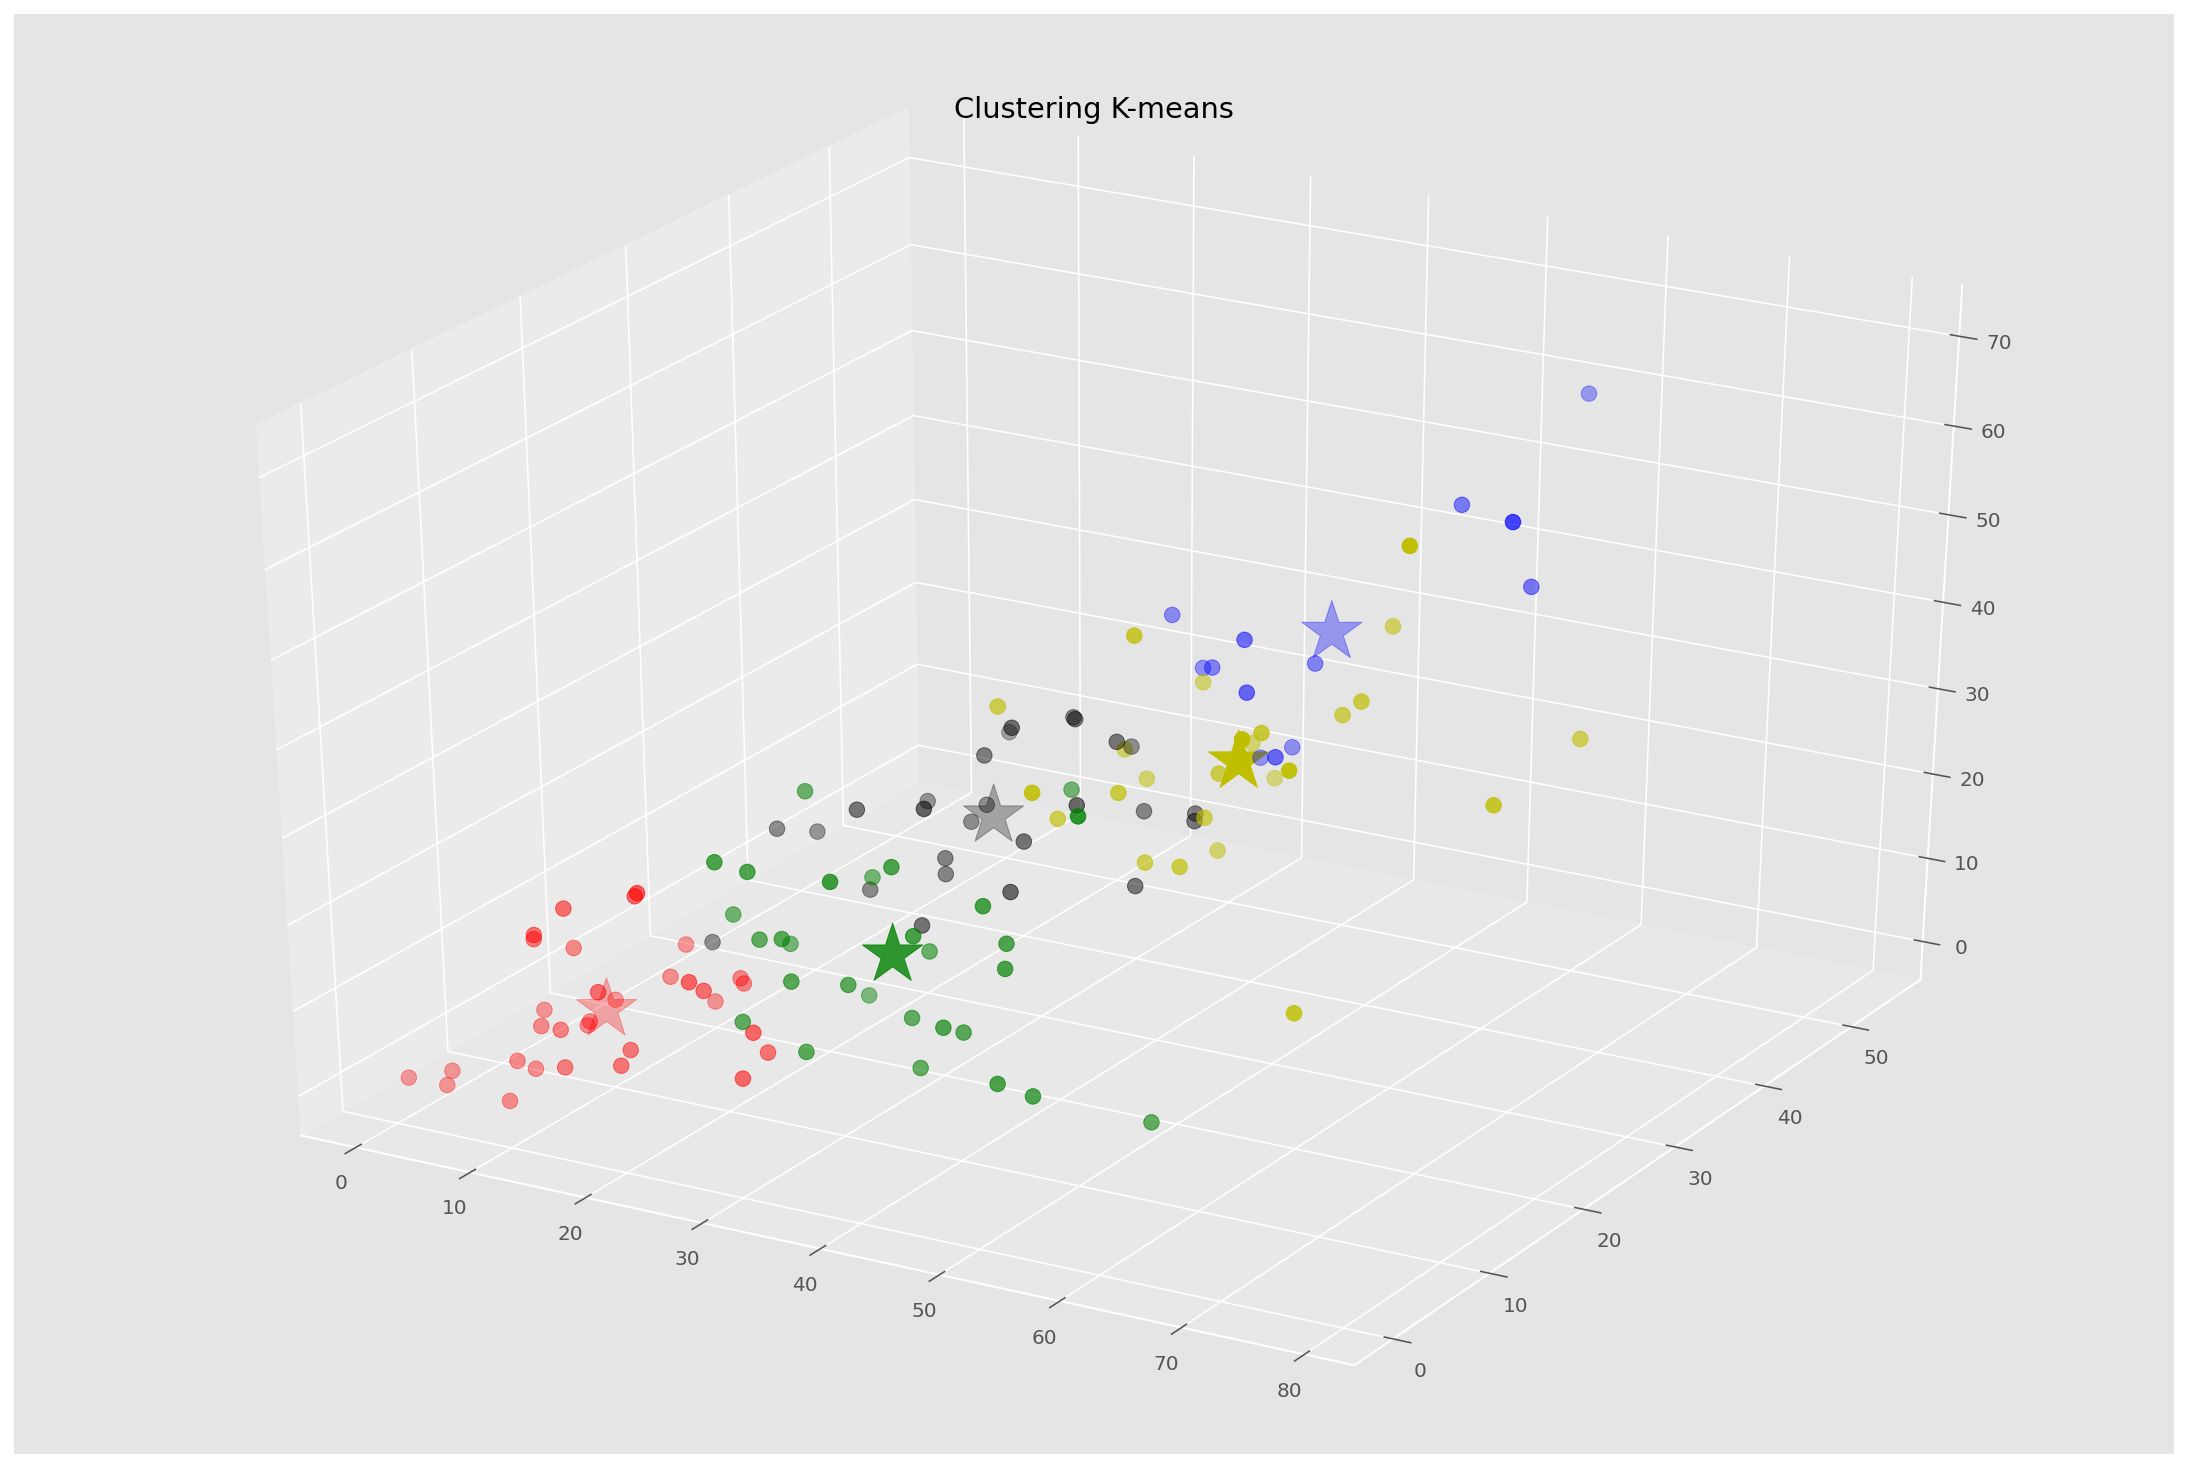

In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('ggplot')

from sklearn.cluster import KMeans

color_map = array(['b','g','r','k', 'y'])

## aplicar el método de k-means para obtener los centroides    
kmeans = KMeans(n_clusters = 5, random_state=1000).fit(data_clustering_mean) 
centroides = kmeans.cluster_centers_ # localizar la posición de los centroides

classes = kmeans.predict(data_clustering_mean) # Obtener a que cluster pertenece cada participante
etiquetas = kmeans.labels_
inercia=kmeans.inertia_
    
#Gráfico
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(data_clustering_mean.iloc[:, 0], data_clustering_mean.iloc[:, 1], data_clustering_mean.iloc[:, 3],
           color=color_map[classes], s=60)
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 3],  marker='*', color=color_map, s=1000)

title('Clustering K-means')

In [61]:
print("La posición de los centroides es:\n", centroides, "\n")

La posición de los centroides es:
 [[51.63143537 33.69370651 32.78300907 43.72914711 41.81618751 29.43037321
  33.64081927 43.54589783]
 [38.67911361  5.05577034  3.57447163 22.53097154 21.94061699  3.5185544
   3.97136415 10.37989133]
 [15.62836089  3.37221489  3.45768189 10.90235931  9.03095922  3.00452139
   3.47477741  7.51790233]
 [34.75863911 19.67262349 19.12334039 27.45670581 26.27646568 18.15336499
  18.64859368 26.04911929]
 [57.4633307  16.91466601 13.99679987 41.45634659 39.79389348  9.69276491
  13.31946877 31.38117021]] 



In [62]:
data_clustering_mean['Sintomas_Cluster'] = kmeans.labels_
listado_participante_cluster = data_clustering_mean['Sintomas_Cluster'].sort_values(ascending = True)

In [63]:
print("Listado de estados y clúster correspondiente:\n")
print(listado_participante_cluster)

Listado de estados y clúster correspondiente:

Participant
6798048    0
3234198    0
3454737    0
3519030    0
3842615    0
8380353    0
9076249    0
2721626    0
8039514    0
4426159    0
5663344    0
5441446    0
6226044    0
6456050    1
3259101    1
7303101    1
6722827    1
6020145    1
7949149    1
8282508    1
4025837    1
8114008    1
5485419    1
8055680    1
5101138    1
5089192    1
3065915    1
3690607    1
8893858    1
9116821    1
9180280    1
9387460    1
9464374    1
2042298    1
1102830    1
8817743    1
2865822    1
2542060    1
131183     1
9585150    1
8737510    1
2823696    1
7403375    2
7706886    2
9177370    2
7534682    2
9873128    2
9813325    2
5834887    2
5625691    2
6203827    2
5670059    2
5684045    2
697356     2
2932753    2
4794044    2
4623292    2
3044816    2
8560321    2
3389164    2
3462095    2
3482879    2
4804938    2
2396819    2
8927660    2
8436248    2
4107491    2
1562380    2
4348581    2
1318587    2
4545717    2
1156365    2
39660